<a href="https://colab.research.google.com/github/irissun9602/Mouse-Dynamics/blob/main/MouseDynamics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####Loading essential libraries

In [ ]:
import glob, os, csv
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [ ]:
import os
import pandas as pd

# Google Drive 마운트
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###Understanding Input Data File

####Load training data of user7 and save as a dataframe.
,Check columns and unique values which has values of type string

In [ ]:
# 사용자 폴더 목록
user_folders = ['user7', 'user9', 'user16', 'user50']  # 사용자 폴더를 필요에 따라 추가

# 모든 CSV 파일을 저장할 빈 데이터프레임 생성
df = pd.DataFrame()

# 각 사용자 폴더에 대해 CSV 파일을 읽어와서 리스트에 추가
for user_folder in user_folders:
    folder_path = f'/content/drive/MyDrive/Colab Notebooks/Mouse-Dynamics-Challenge-master/Mouse-Dynamics-Challenge-master/training_files/{user_folder}/'

    # 해당 폴더에 있는 모든 CSV 파일 목록 가져오기
    csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

    # 각 CSV 파일을 읽어와서 리스트에 추가
    for csv_file in csv_files:
        file_path = os.path.join(folder_path, csv_file)
        cs = pd.read_csv(file_path)

        cs['y_label'] = user_folder.replace('user', '')
        df = pd.concat([df, cs], ignore_index=True)

# 결과 출력
print(df)

         record timestamp  client timestamp    button state    x    y y_label
0                   0.000             0.000  NoButton  Move  250   46       7
1                   0.000             0.015  NoButton  Move  252   46       7
2                   0.000             0.031  NoButton  Move  257   46       7
3                   0.000             0.062  NoButton  Move  268   46       7
4                   0.138             0.078  NoButton  Move  283   46       7
...                   ...               ...       ...   ...  ...  ...     ...
1092001           599.990           599.990       NaN  move  526  326      50
1092002           600.000           600.000       NaN  move  499  319      50
1092003           600.010           600.010       NaN  move  498  319      50
1092004           600.020           600.020       NaN  move  490  314      50
1092005           600.030           600.030       NaN  move  479  309      50

[1092006 rows x 7 columns]


In [ ]:
# 사용자 폴더 목록
user_folders = ['user7']  # 사용자 폴더를 필요에 따라 추가

# 모든 CSV 파일을 저장할 빈 데이터프레임 생성
df = pd.DataFrame()
df3 = pd.DataFrame()

# 각 사용자 폴더에 대해 CSV 파일을 읽어와서 리스트에 추가
for user_folder in user_folders:
    folder_path = f'/content/drive/MyDrive/Colab Notebooks/Mouse-Dynamics-Challenge-master/Mouse-Dynamics-Challenge-master/training_files/{user_folder}/'

    # 해당 폴더에 있는 모든 CSV 파일 목록 가져오기
    csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

    # 각 CSV 파일을 읽어와서 리스트에 추가
    for csv_file in csv_files:
        file_path = os.path.join(folder_path, csv_file)
        cs = pd.read_csv(file_path)

        cs['y_label'] = user_folder.replace('user', '')
        df = pd.concat([df, cs], ignore_index=True)

# 각 사용자 폴더에 대해 CSV 파일을 읽어와서 리스트에 추가
for user_folder in user_folders:
    folder_path = f'/content/drive/MyDrive/Colab Notebooks/Mouse-Dynamics-Challenge-master/Mouse-Dynamics-Challenge-master/test_files/{user_folder}/'

    # 해당 폴더에 있는 모든 CSV 파일 목록 가져오기
    csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

    # 각 CSV 파일을 읽어와서 리스트에 추가
    for csv_file in csv_files:
        file_path = os.path.join(folder_path, csv_file)
        cs = pd.read_csv(file_path)

        cs['y_label'] = user_folder.replace('user', '')
        df3 = pd.concat([df3, cs], ignore_index=True)

# 결과 출력
print(df)

        record timestamp  client timestamp    button     state    x    y  \
0                  0.000             0.000  NoButton      Move  250   46   
1                  0.000             0.015  NoButton      Move  252   46   
2                  0.000             0.031  NoButton      Move  257   46   
3                  0.000             0.062  NoButton      Move  268   46   
4                  0.138             0.078  NoButton      Move  283   46   
...                  ...               ...       ...       ...  ...  ...   
426055          3804.698          3804.600  NoButton      Move  101  581   
426056          3804.698          3804.615  NoButton      Move  101  582   
426057          3804.698          3804.631  NoButton      Move  100  582   
426058          3804.698          3804.709      Left   Pressed  100  582   
426059          3804.797          3804.818      Left  Released  100  582   

       y_label  
0            7  
1            7  
2            7  
3            7  
4 

In [ ]:
df.head

<bound method NDFrame.head of         record timestamp  client timestamp    button     state    x    y  \
0                  0.000             0.000  NoButton      Move  250   46   
1                  0.000             0.015  NoButton      Move  252   46   
2                  0.000             0.031  NoButton      Move  257   46   
3                  0.000             0.062  NoButton      Move  268   46   
4                  0.138             0.078  NoButton      Move  283   46   
...                  ...               ...       ...       ...  ...  ...   
426055          3804.698          3804.600  NoButton      Move  101  581   
426056          3804.698          3804.615  NoButton      Move  101  582   
426057          3804.698          3804.631  NoButton      Move  100  582   
426058          3804.698          3804.709      Left   Pressed  100  582   
426059          3804.797          3804.818      Left  Released  100  582   

       y_label  
0            7  
1            7  
2     

####Mapping columns with string fields to integer values

In [ ]:
df["button"].fillna(0, inplace=True)

In [ ]:
di = {'NoButton': 0, 'Left': 1, 'Right': 2, 'Button.left': 1, 'Button.right': 2, 'Scroll' : 3}
dj = {'Move': 0, 'move' : 0, 'Pressed': 1, 'Released' : 2, 'Drag' : 3, 'Up' : 4, 'Down' : 5, 'Scrolled (0, 1)' : 6, 'Scrolled (0, -1)' : 7, 'Clicked' :1, 'Scrolled (0, -2)' : 8}
df["button"].replace(di, inplace=True)
df["state"].replace(dj, inplace=True)
print(df.head(10))
# print(df.describe())

   record timestamp  client timestamp  button  state    x   y y_label
0             0.000             0.000       0      0  250  46       7
1             0.000             0.015       0      0  252  46       7
2             0.000             0.031       0      0  257  46       7
3             0.000             0.062       0      0  268  46       7
4             0.138             0.078       0      0  283  46       7
5             0.138             0.093       0      0  321  46       7
6             0.138             0.109       0      0  350  48       7
7             0.138             0.125       0      0  373  51       7
8             0.138             0.140       0      0  398  52       7
9             0.138             0.156       0      0  421  56       7


###Feature Extraction

####Sort data according to column 'client timestamp' then calculate time taken between mouse movements, speed of mouse movements, curvature and radius of curvature

Features identified :
1. time between mouse movements
2. mouse speed
3. mouse movement arc curvature
4. frequency of  mouse clicks

In [ ]:
df.sort_values("client timestamp")
df.insert(0, "Serial_no", range(0,len(df.index.values)))
df["delta_client_time"] = df["client timestamp"].diff(-1)
df["delta_client_time"] = df["delta_client_time"].abs()
df["delta_x"] = df["x"].diff(-1)
df["delta_y"] = df["y"].diff(-1)
df["delta_dist"] = np.sqrt( (df["delta_x"])**2 + (df["delta_y"])**2 )
df["mouse_speed"] = np.where(df["delta_client_time"] != 0, df["delta_dist"] / df["delta_client_time"], np.nan)
df["mouse_speed"] = df["mouse_speed"].abs()
df["slope"] = np.where(df["delta_x"] != 0, df["delta_y"] / df["delta_x"], np.nan)
df["delta_slope"] = df["slope"].diff(-1)
df["curvature"] = np.where(df["delta_x"] != 0, df["delta_slope"] / df["delta_x"], np.nan)
df["curvature"] = df["curvature"].abs()
# df["radius_of_curvature"] = 1 / df["curvature"]

Note: The curvature is important as if it has many values as zero, it means the mouse is moving in a perfectly straight line for longer periods, which is more likely a bot like behavior.

####Frequency of mouse clicks varying with client timestamp

In [ ]:
# clicks_so_far, click_frequency 계산 및 무한대 값 처리
clicks_so_far = []
for index, row in df.iterrows():
    if index != 0:
        clicks_so_far.append(clicks_so_far[-1] + (1 if row["button"] != 0 else 0))
    else:
        clicks_so_far.append(1 if row["button"] != 0 else 0)

df['clicks_so_far'] = clicks_so_far
df['click_frequency'] = df['clicks_so_far'] / df['client timestamp'].replace(0, 1)  # 0으로 나누는 것 방지

# inf 값을 0으로 처리
df['click_frequency'] = df['click_frequency'].replace([np.inf, -np.inf], 0)

In [ ]:
df1 = df.dropna()
df1.describe()


,record timestamp,client timestamp,button,state,x,y
count,426060.000000,426060.000000,426060.000000,426060.00000,426060.000000,426060.000000
mean,2746.734574,2746.341968,0.156924,0.36558,322.560595,350.990734
std,1946.531066,1946.120130,0.619174,1.11441,303.307137,278.655189
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1086.774000,1086.765750,0.000000,0.00000,184.000000,205.000000
50%,2508.319500,2508.309000,0.000000,0.00000,278.000000,353.000000
75%,3851.534000,3851.243000,0.000000,0.00000,406.000000,487.000000
max,7806.752000,7806.789000,3.000000,5.00000,65535.000000,65535.000000


####Visualizing features

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
X = df1.drop(['Serial_no', 'y_label'], axis=1)  # Assuming 'session_id' is not a feature
# One-hot encode categorical columns
y = df1['y_label']

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# 데이터 스케일링
scaler = StandardScaler()
Scaled_X = scaler.fit_transform(X)


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Scaled_X, y, test_size=0.7, random_state=42)

# Create a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Display classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.9999547028767556
              precision    recall  f1-score   support

          16       1.00      1.00      1.00    203971
           7       1.00      1.00      1.00    359914
           9       1.00      1.00      1.00    208791

    accuracy                           1.00    772676
   macro avg       1.00      1.00      1.00    772676
weighted avg       1.00      1.00      1.00    772676



In [ ]:
print(y_test[20])

7


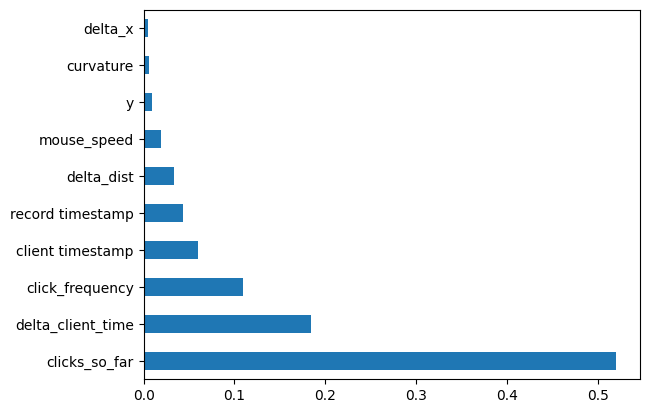

In [ ]:
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importance.nlargest(10).plot(kind='barh')
plt.show()

In [ ]:
print(rf_model)

RandomForestClassifier(random_state=42)


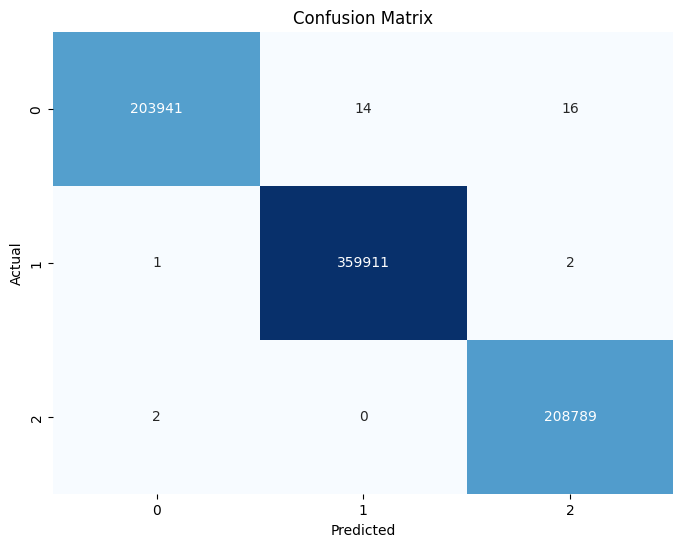

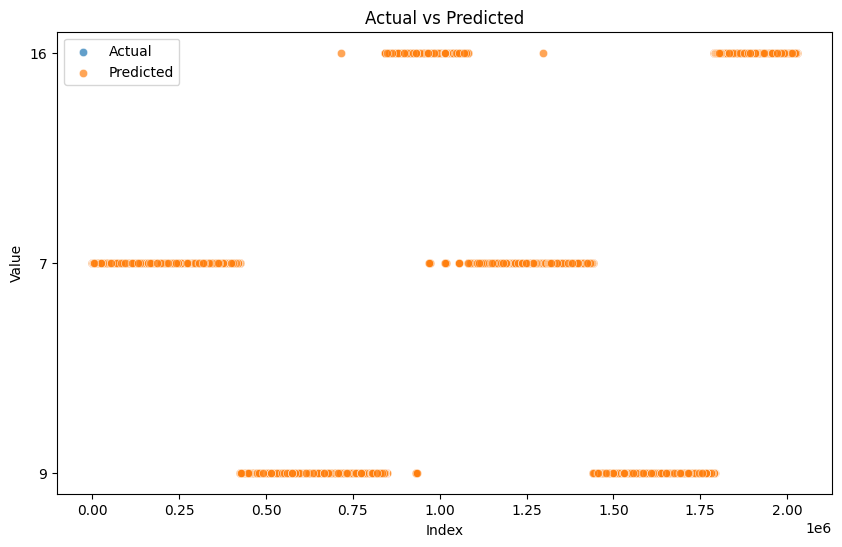

In [ ]:
import seaborn as sns

# 실제 값과 예측 값을 데이터프레임으로 변환
result_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Confusion Matrix 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 실제 값과 예측 값 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(x=result_df.index, y='Actual', data=result_df, label='Actual', alpha=0.7)
sns.scatterplot(x=result_df.index, y='Predicted', data=result_df, label='Predicted', alpha=0.7)
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

In [ ]:
from scipy.stats import mannwhitneyu

# 두 그룹의 데이터 (예: 그룹 A와 그룹 B의 데이터)
data_group_a = df1['x']  # 그룹 A의 데이터
data_group_b = df4['x']  # 그룹 B의 데이터

# Mann-Whitney U 검정 수행
statistic, p_value = mannwhitneyu(data_group_a, data_group_b)

# 결과 출력
print("Mann-Whitney U 검정 통계량:", statistic)
print("p-value:", p_value)

# 유의수준 0.05에서 검정
alpha = 0.05
if p_value < alpha:
    print("유의수준 {}에서 두 그룹의 차이가 유의미합니다.".format(alpha))
else:
    print("유의수준 {}에서 두 그룹의 차이가 유의미하지 않습니다.".format(alpha))


Mann-Whitney U 검정 통계량: 70721382897.5
p-value: 0.0
유의수준 0.05에서 두 그룹의 차이가 유의미합니다.


In [ ]:
from scipy.stats import shapiro

# 예시 데이터 (data라는 변수에 데이터를 할당)
# data = [your_data_here]

# Shapiro-Wilk 검정을 사용하여 정규성 검정
stat, p = shapiro(Scaled_X)

# 결과 출력
alpha = 0.05  # 유의수준
print(f'Statistics={stat}, p-value={p}')
if p > alpha:
    print('데이터는 정규분포를 따릅니다 (귀무가설 기각불가)')
else:
    print('데이터는 정규분포를 따르지 않습니다 (귀무가설 기각)')

Statistics=0.3276243209838867, p-value=0.0
데이터는 정규분포를 따르지 않습니다 (귀무가설 기각)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
result_df

,Actual,Predicted
1844743,16,16
1159535,7,7
1777609,9,9
2002344,16,16
817346,9,9
...,...,...
114149,7,7
818687,9,9
132758,7,7
1455656,9,9


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# 모델을 사용하여 테스트 데이터 예측
y_pred = model.predict(X_test)

# 모델 예측값을 클래스로 변환 (가장 높은 확률을 갖는 클래스 선택)
predicted_classes = np.argmax(y_pred, axis=1)

# 혼동 행렬 생성
conf_matrix = confusion_matrix(y_test, predicted_classes)

# 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


NameError: ignored

In [ ]:
import matplotlib.pyplot as plt

# 예측 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()


In [ ]:
y_test

In [ ]:
import seaborn as sns

# 실제 값과 예측 값을 데이터프레임으로 변환
result_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Confusion Matrix 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 실제 값과 예측 값 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(x=result_df.index, y='Actual', data=result_df, label='Actual', alpha=0.7)
sns.scatterplot(x=result_df.index, y='Predicted', data=result_df, label='Predicted', alpha=0.7)
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

In [ ]:


# 예측 결과 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True')
plt.plot(predictions, label='Predicted')
plt.title('True vs Predicted')
plt.legend()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df1['client timestamp'], df1['click_frequency'])
plt.title('Variation of Click Frequency with Client Timestamp')
plt.ylabel('Click Frequency')
plt.xlabel('Client Timestamp')

# x축 범위를 0부터 100까지로 설정
plt.xlim(0.0, 2000.0)
plt.ylim(0.0, 3.0)
plt.show()


In [ ]:
plt.scatter(df1['client timestamp'], df1['click_frequency'])
plt.title('Variation of Click Frequency with Client Timestamp')
plt.ylabel('Click Frequency')
plt.xlabel('Client Timestamp')
plt.show()

In [ ]:
plt.scatter(df1['client timestamp'], df1['mouse_speed'])
plt.title('Variation of Mouse Speed with Client Timestamp')
plt.xlabel('Client Timestamp')
plt.ylabel('Mouse Speed')
plt.show()

In [ ]:
plt.scatter(df1['client timestamp'], df1['curvature'])
plt.title('Variation of Curvature with Client Timestamp')
plt.xlabel('Client Timestamp')
plt.ylabel('Curvature')
plt.show()